In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sf = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape")

In [3]:
print("📌 Basic Statistical Summary:")
display(sf.describe())

📌 Basic Statistical Summary:


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
sf['Date'] = pd.to_datetime(sf['Date'], dayfirst=True)
sf['Month'] = sf.Date.dt.month_name().str[:3]
sf['Year'] = sf.Date.dt.year
sf['Weekday'] = sf.Date.dt.weekday
sf['Weekday'] = sf['Weekday'].map({
    0: "Monday", 1: "Tuesday", 2: "Wednesday",
    3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"
})
sf["Weekday"] = pd.Categorical(
    sf["Weekday"],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    ordered=True
)
sf.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017,Friday


In [4]:
print("\n📌 Column Data Info:")
display(sf.info())


📌 Column Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            

None

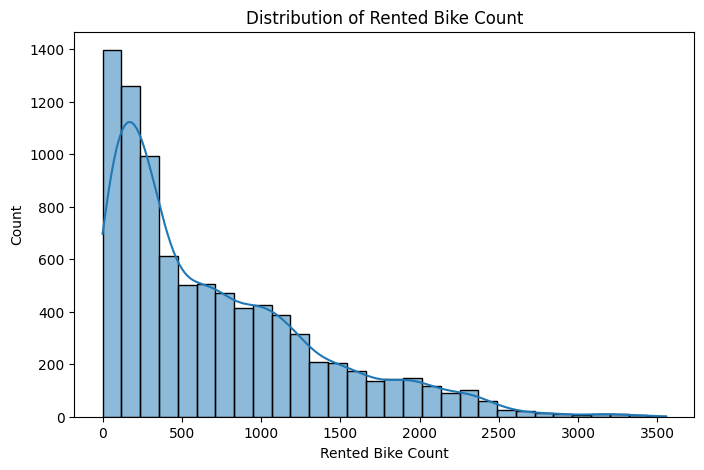

In [5]:
#1. Distribution of Rental Counts
plt.figure(figsize=(8,5))
sns.histplot(sf['Rented Bike Count'], bins=30, kde=True)
plt.title("Distribution of Rented Bike Count")
plt.show()

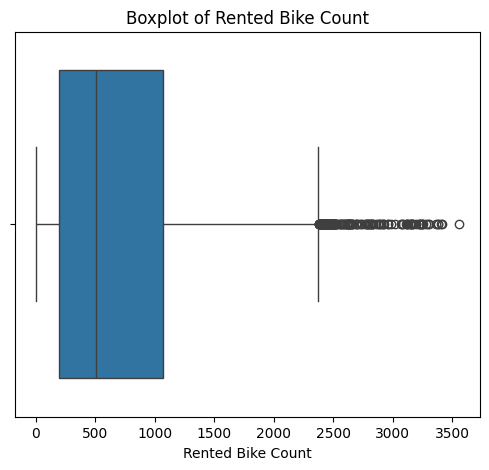

In [6]:
#2.Boxplot — Outlier check in Rental Count
plt.figure(figsize=(6,5))
sns.boxplot(x=sf['Rented Bike Count'])
plt.title("Boxplot of Rented Bike Count")
plt.show()

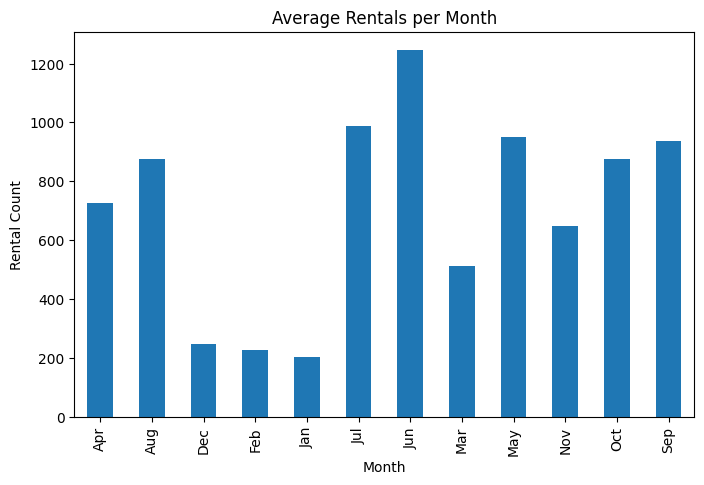

In [8]:
monthly_avg = sf.groupby('Month')['Rented Bike Count'].mean()
plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar')
plt.title("Average Rentals per Month")
plt.ylabel("Rental Count")
plt.show()



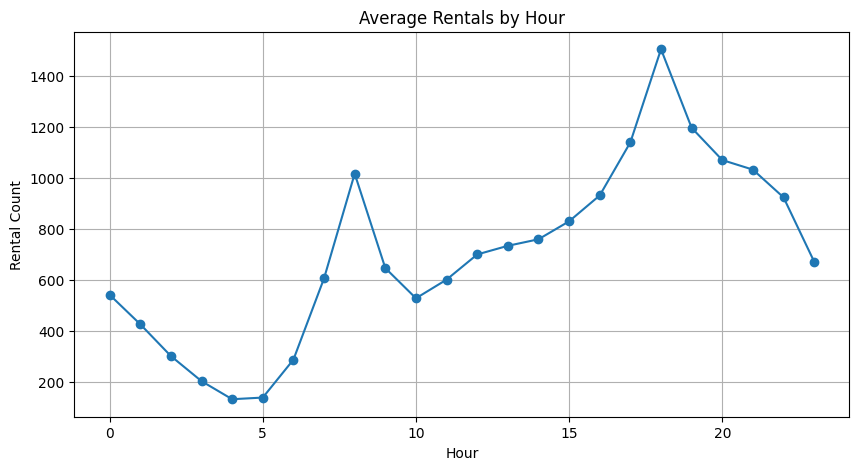

In [8]:
# 4. Rentals by Hour of Day
hourly_avg = sf.groupby('Hour')['Rented Bike Count'].mean()
plt.figure(figsize=(10,5))
plt.plot(hourly_avg, marker='o')
plt.title("Average Rentals by Hour")
plt.xlabel("Hour")
plt.ylabel("Rental Count")
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16968\2511300540.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = sf.groupby('Weekday')['Rented Bike Count'].mean()


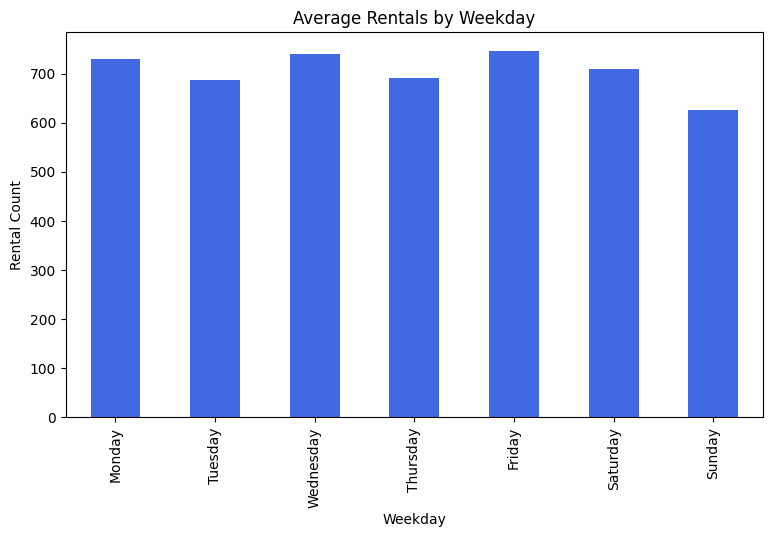

In [9]:
#  5. Rentals by Weekday
weekday_avg = sf.groupby('Weekday')['Rented Bike Count'].mean()
weekday_avg.plot(kind='bar', figsize=(9,5), color='royalblue')
plt.title("Average Rentals by Weekday")
plt.ylabel("Rental Count")
plt.show()

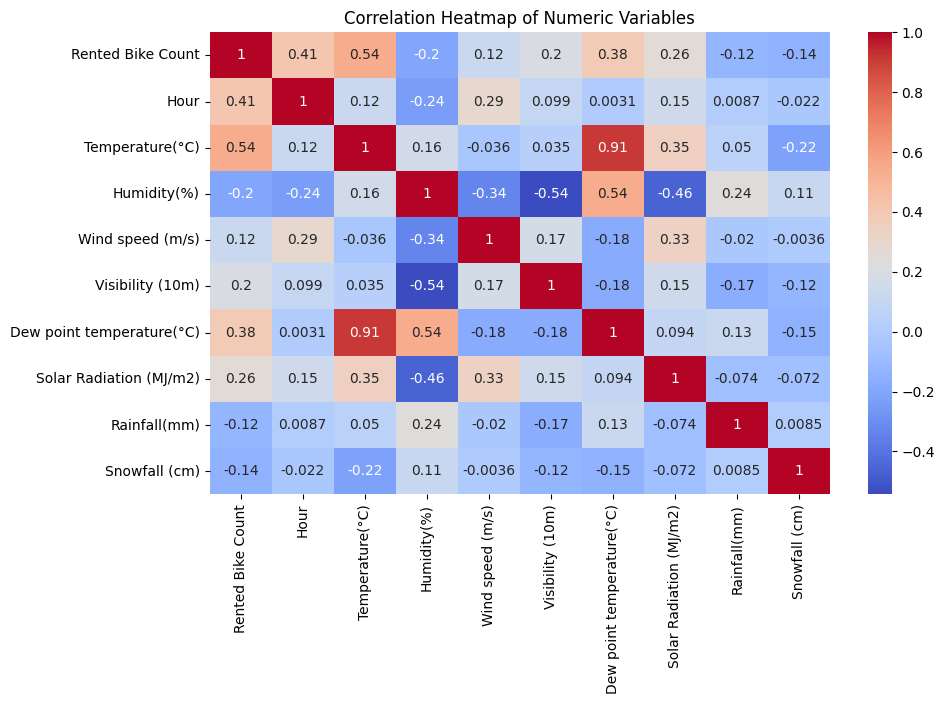

In [4]:
#  6. Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = sf.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


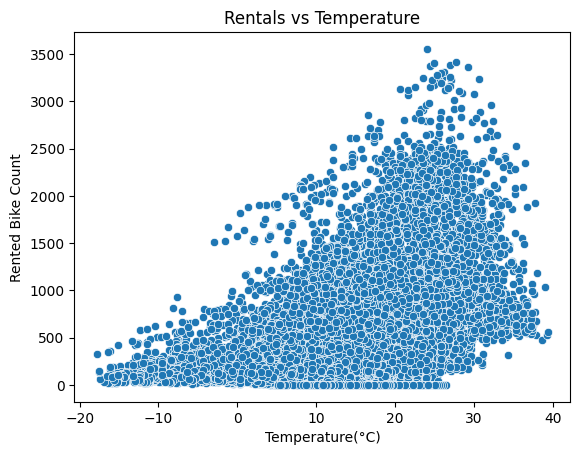

In [11]:
# 7. Rentals vs Temperature

sns.scatterplot(data=sf, x="Temperature(°C)", y="Rented Bike Count")
plt.title("Rentals vs Temperature")
plt.show()

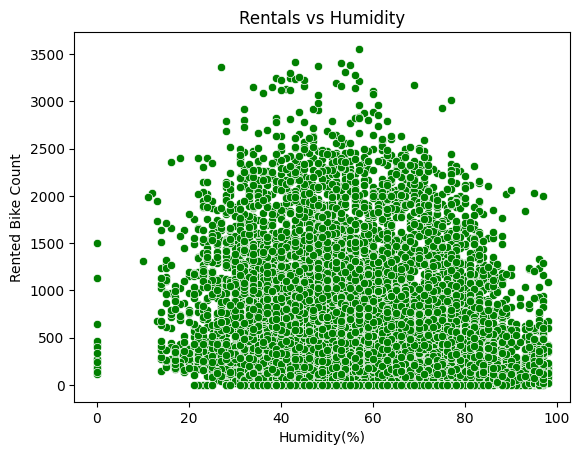

In [12]:
#  8. Rentals vs Humidity
sns.scatterplot(data=sf, x="Humidity(%)", y="Rented Bike Count", color="green")
plt.title("Rentals vs Humidity")
plt.show()

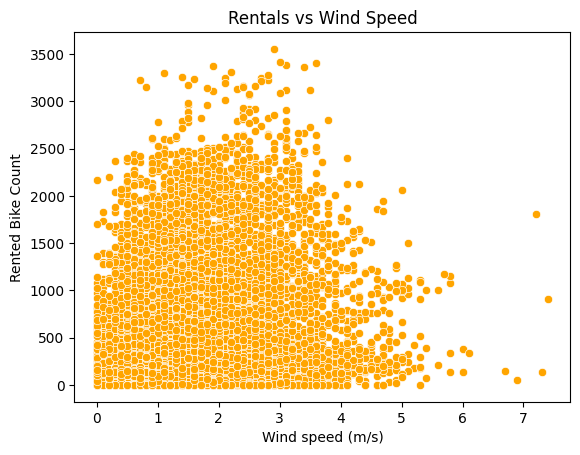

In [13]:
#  9. Rentals vs Wind Speed
sns.scatterplot(data=sf, x="Wind speed (m/s)", y="Rented Bike Count", color="orange")
plt.title("Rentals vs Wind Speed")
plt.show()

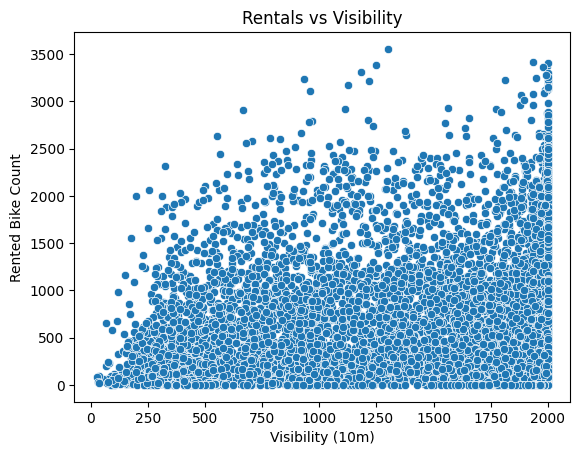

In [14]:
# 10. Rentals vs Visibility
sns.scatterplot(data=sf, x="Visibility (10m)", y="Rented Bike Count")
plt.title("Rentals vs Visibility")
plt.show()

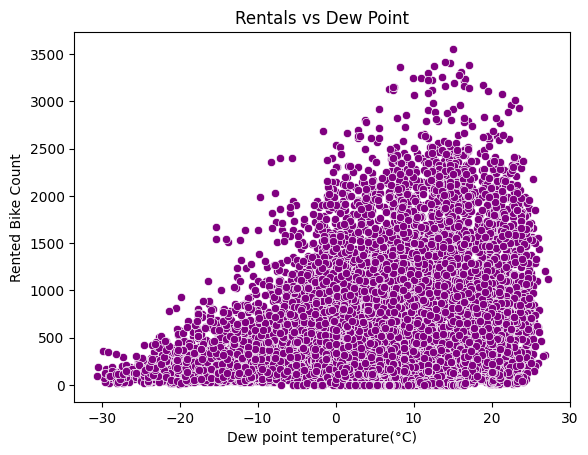

In [15]:
# 11. Rentals vs Dew Point
sns.scatterplot(data=sf, x="Dew point temperature(°C)", y="Rented Bike Count", color="purple")
plt.title("Rentals vs Dew Point")
plt.show()

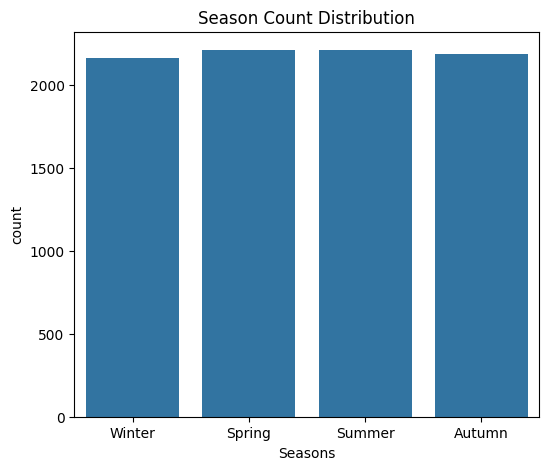

In [16]:
# 12. Count of Seasons
plt.figure(figsize=(6,5))
sns.countplot(x=sf['Seasons'])
plt.title("Season Count Distribution")
plt.show()

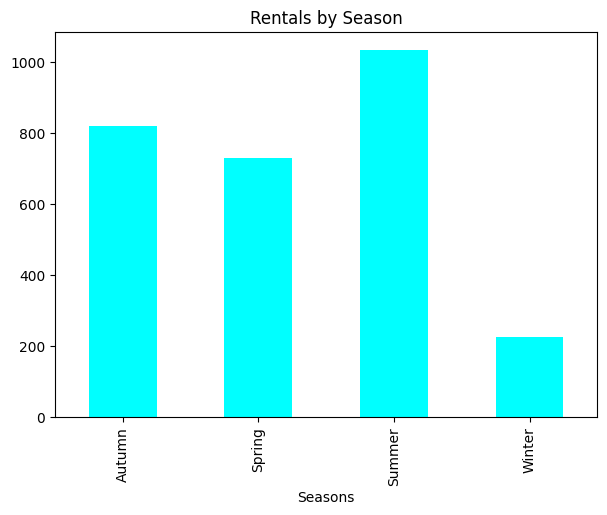

In [17]:
# 13. Rentals by Season
season_avg = sf.groupby('Seasons')['Rented Bike Count'].mean()
season_avg.plot(kind='bar', color='cyan', figsize=(7,5))
plt.title("Rentals by Season")
plt.show()

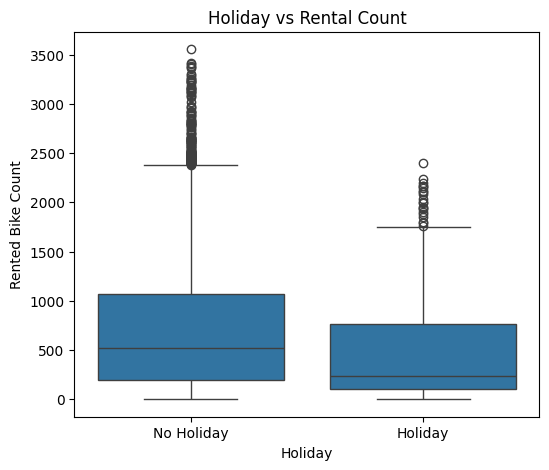

In [18]:
# 14. Rentals vs Holiday
plt.figure(figsize=(6,5))
sns.boxplot(x="Holiday", y="Rented Bike Count", data=sf)
plt.title("Holiday vs Rental Count")
plt.show()


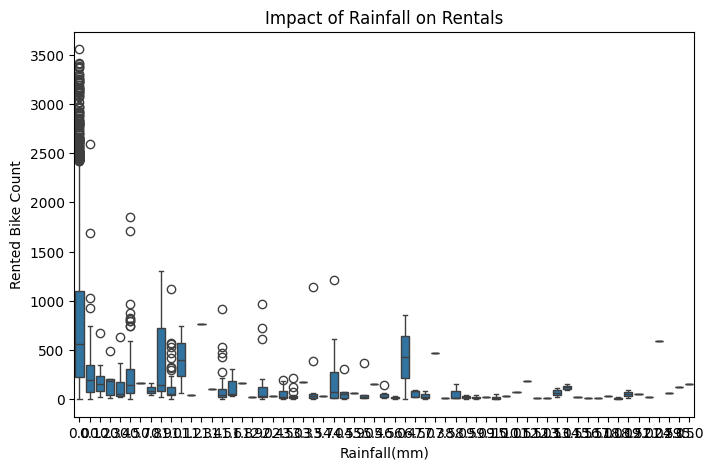

In [19]:
# 15. Rentals vs Rain Snow
plt.figure(figsize=(8,5))
sns.boxplot(x="Rainfall(mm)", y="Rented Bike Count", data=sf)
plt.title("Impact of Rainfall on Rentals")
plt.show()

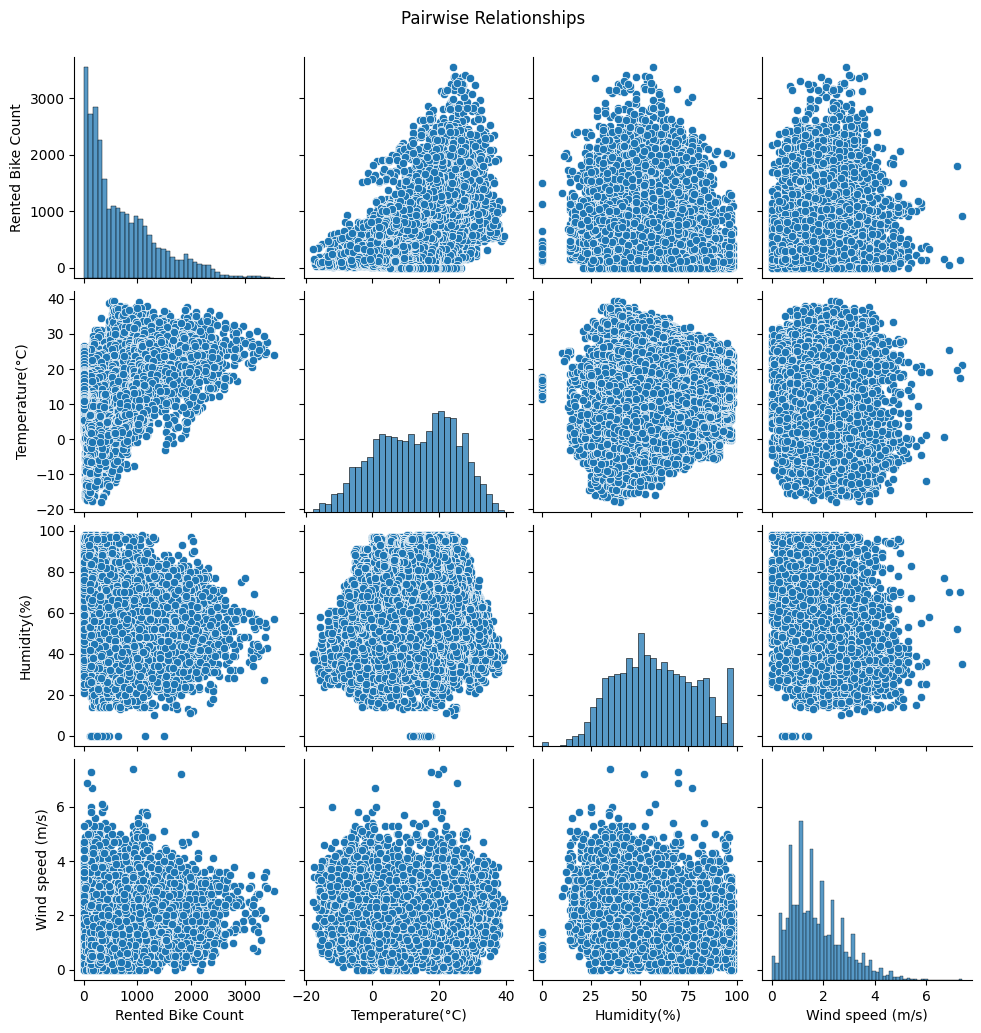

In [20]:
# 16. Pairplot of Key Features
key_cols = ['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)']
sns.pairplot(sf[key_cols])
plt.suptitle("Pairwise Relationships", y=1.03)
plt.show()